# Booking Cancellation data EDA

## About Data
This dataset comprises a diverse range of features, including booking details, customer information, and reservation specifics. The information has been meticulously gathered from real-world hotel booking scenarios, ensuring authenticity and relevance for predictive modeling.

## Columns
1. Booking_ID - Unique identifier for booking
2. number of adults- Number of adults included in the booking
3. number of children- Number of children included in the booking
4. number of weekend nights- Number of weekend nights included in the booking
5. number of week nights- Number of week nights included in the booking
6. type of meal- type of meal included in the booking
7. car parking space- Indicates whether a car parking space was requested or included in the booking
8. room type - Type of room booked
9. lead time- Number of days between the booking date and the arrival date 
10. market segment type- Type of market segment associated with the booking
11. repeated- Indicates whether the booking is a repeat booking
12. P-C -> Number of previous bookings that were canceled by the customer prior to the current booking
13. P-not-C -> Number of previous bookings not canceled by the customer prior to the current booking
14. average price - Average price associated with the booking
15. special requests- Number of special requests made by the guest
16. date of reservation- Date of the reservation
17. booking status- Status of the booking ( canceled or not canceled)

## EDA Content
1. Check for the distribution of numerical and categorical data
2. Check for missing data
3. Check for correlation between the variables and with the dependent label 
4. Check for interesting patterns in the data <br>
    a. Does date of reservation(weekend/weekday) have an impact on booking cancellation? <br>
    b. Is there a higher probability for booking cancellation provided the guests have cancelled many bookings prior? <br>
    c. Does price play a role in booking cancellation? Do they get it cheaper via offline mode? <br>
    d. Does high lead time leads to high chance of booking cancellation? <br>
    e. Are Offline bookings have less chance of booking cancellation? <br>
    f. Does family with children impact booking cancellation? <br>
    g. Are family without children price sensitive? and do they prefer booking on weekend? <br>
5. Check for outliers


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [2]:
booking_data=pd.read_csv('booking.csv')
booking_data.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [3]:
booking_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

### Distribution of Data
#### Categorical column distribution

In [4]:
object_columns=booking_data.select_dtypes(include=['object']).columns
object_columns = [col for col in object_columns if col not in ["Booking_ID","date of reservation"]]
print(object_columns)

['type of meal', 'room type', 'market segment type', 'booking status']


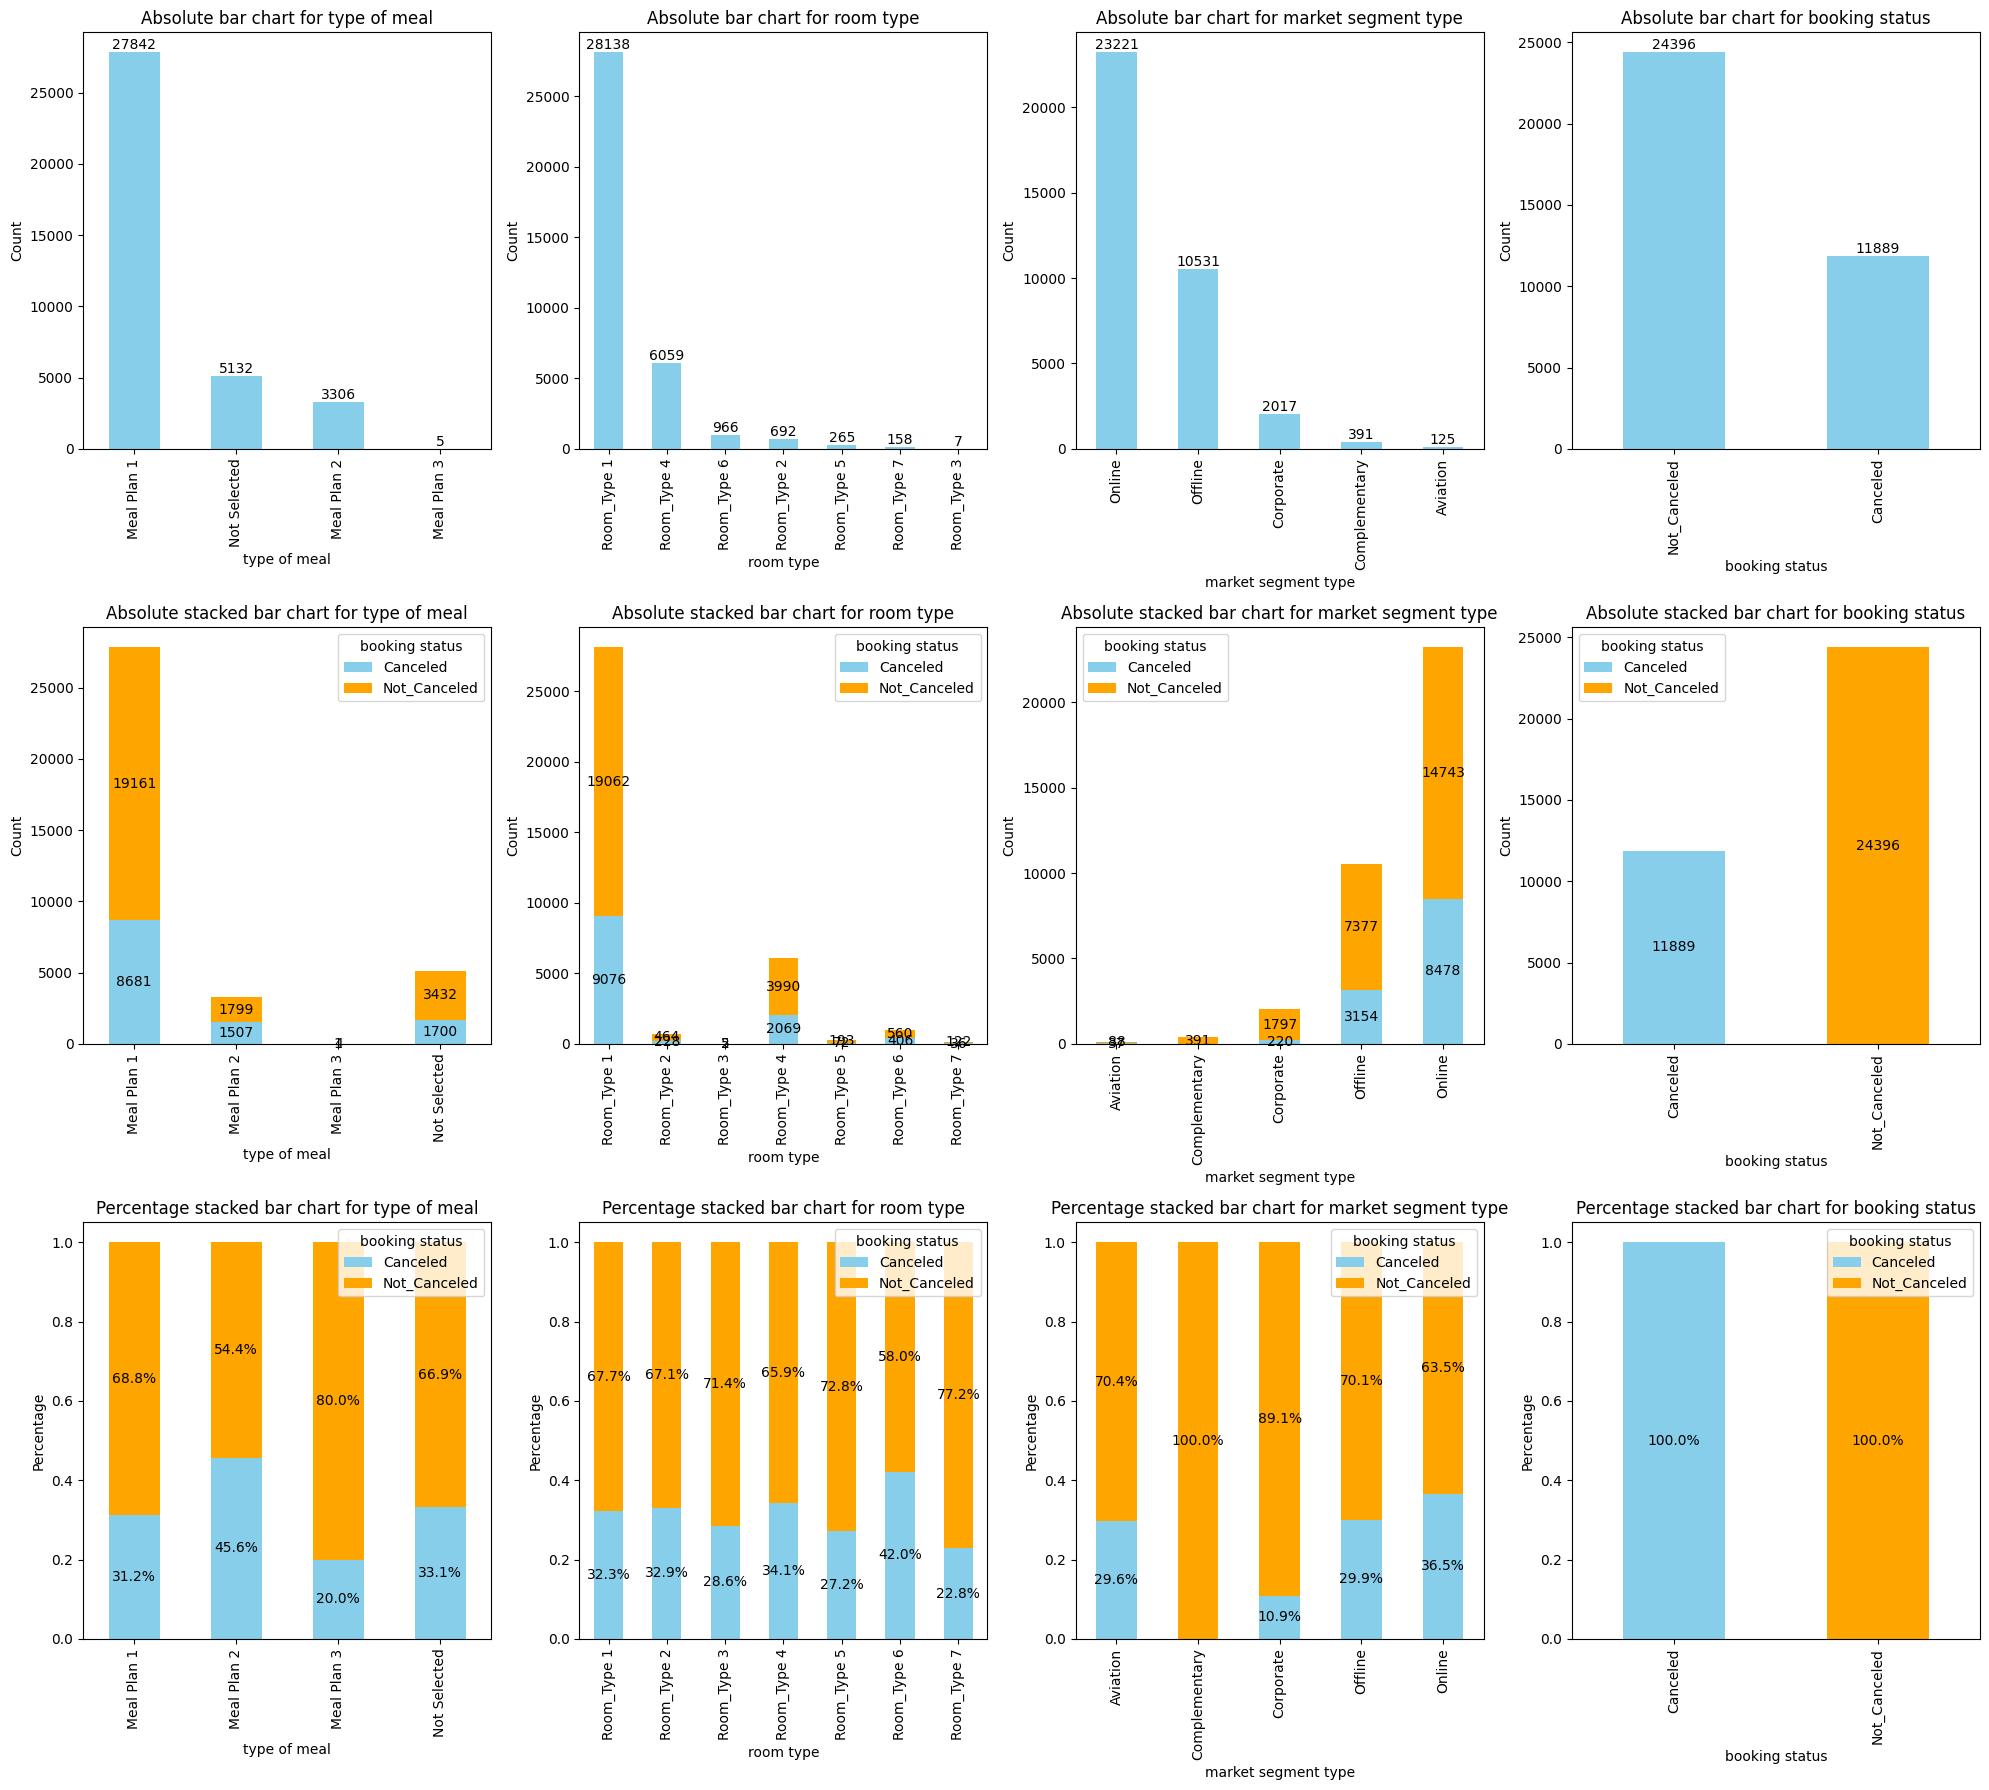

In [5]:
num_columns = len(object_columns)
fig, axes = plt.subplots(nrows=3, ncols=num_columns, figsize=(5*num_columns, 18))


for i, column in enumerate(object_columns):
    # Absolute value-based bar chart (not stacked)
    ax_abs = axes[0, i]
    counts_abs = booking_data[column].value_counts()
    bars_abs = counts_abs.plot(kind='bar', ax=ax_abs, color='skyblue')
    ax_abs.set_title(f'Absolute bar chart for {column}')
    ax_abs.set_xlabel(column)
    ax_abs.set_ylabel('Count')
    
    for bar in bars_abs.patches:
        ax_abs.annotate(format(bar.get_height(), '.0f'), 
                        xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                        xytext=(0, 5), 
                        textcoords="offset points", 
                        ha='center', va='center')
    
    # Absolute value-based stacked bar chart
    ax_stack_abs = axes[1, i]
    crosstab_abs = pd.crosstab(booking_data[column], booking_data['booking status'])
    bars_stack_abs = crosstab_abs.plot(kind='bar', stacked=True, ax=ax_stack_abs, color=['skyblue', 'orange'])  # Adjust colors as needed
    ax_stack_abs.set_title(f'Absolute stacked bar chart for {column}')
    ax_stack_abs.set_xlabel(column)
    ax_stack_abs.set_ylabel('Count')
    
    for bar in ax_stack_abs.patches:
        height = bar.get_height()
        if height > 0: 
            ax_stack_abs.annotate(format(height, '.0f'), 
                                  xy=(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2),
                                  xytext=(0, 0),  
                                  textcoords="offset points", 
                                  ha='center', va='center')
    
    # Percentage-based stacked bar chart
    ax_stack_pct = axes[2, i]
    crosstab_pct = pd.crosstab(booking_data[column], booking_data['booking status'], normalize='index')
    bars_stack_pct = crosstab_pct.plot(kind='bar', stacked=True, ax=ax_stack_pct, color=['skyblue', 'orange'])  # Adjust colors as needed
    
    ax_stack_pct.set_title(f'Percentage stacked bar chart for {column}')
    ax_stack_pct.set_xlabel(column)
    ax_stack_pct.set_ylabel('Percentage')
    

    for bar in ax_stack_pct.patches:
        width = bar.get_width()
        height = bar.get_height()
        x = bar.get_x()
        y = bar.get_y()
        label_text = f'{height:.1%}'
        if height > 0:  
            ax_stack_pct.annotate(label_text, 
                                  xy=(x + width / 2, y + height / 2),
                                  xytext=(0, 0),  
                                  textcoords="offset points",
                                  ha='center', va='center')
    
plt.tight_layout()
plt.show()


##### Insights:
1. Meal plan 1 is largely preferred and it has 14% less cancellations than Meal plan 2.
2. Room type doesn't seem to be significant differentiator on cancellation rate as ~30% of all bookings across any type of rooms gets cancelled
3. Online bookings has 7% more cancellations than offline bookings and corporate bookings has a lower cancellation rate

#### Numerical column distribution

In [6]:
numerical_columns=booking_data.select_dtypes(include=['int64','float64']).columns

print(numerical_columns)

Index(['number of adults', 'number of children', 'number of weekend nights',
       'number of week nights', 'car parking space', 'lead time', 'repeated',
       'P-C', 'P-not-C', 'average price', 'special requests'],
      dtype='object')


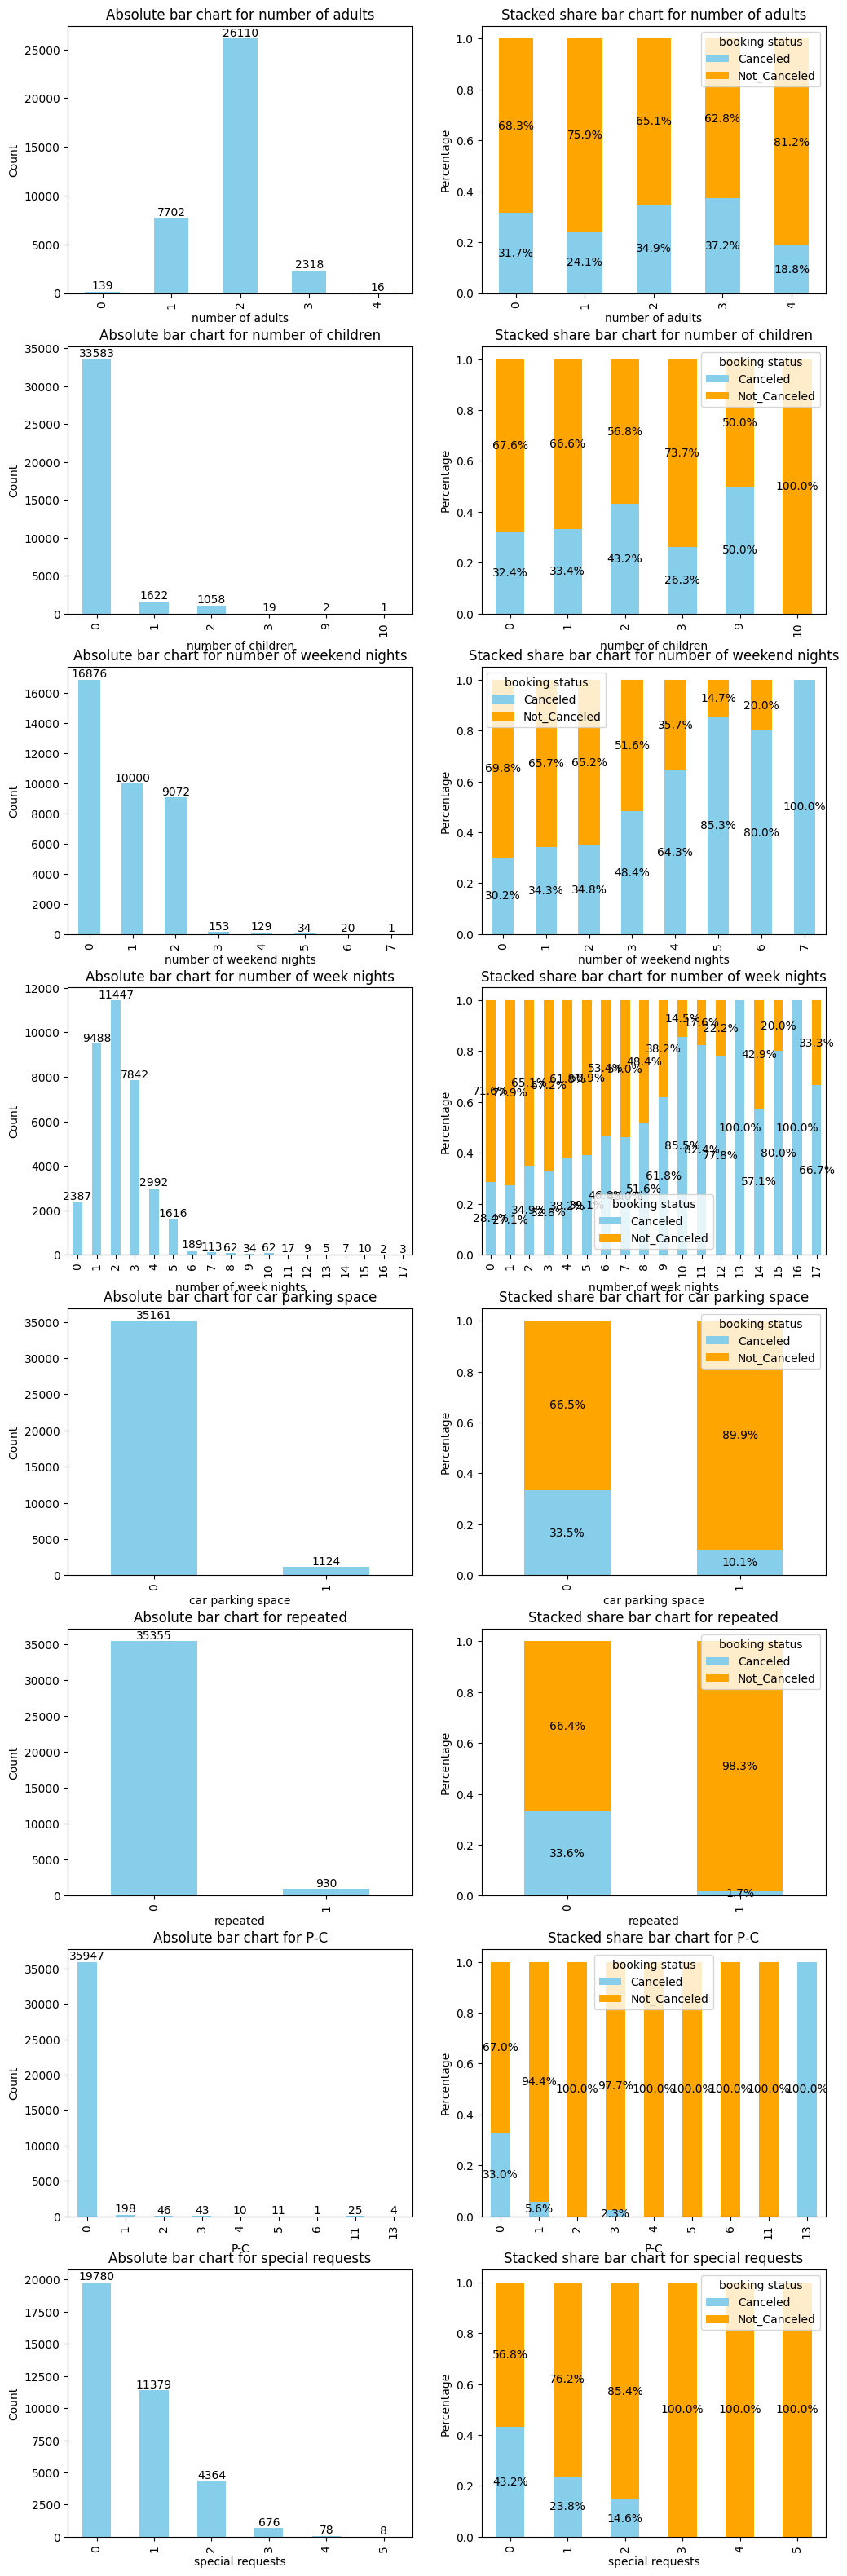

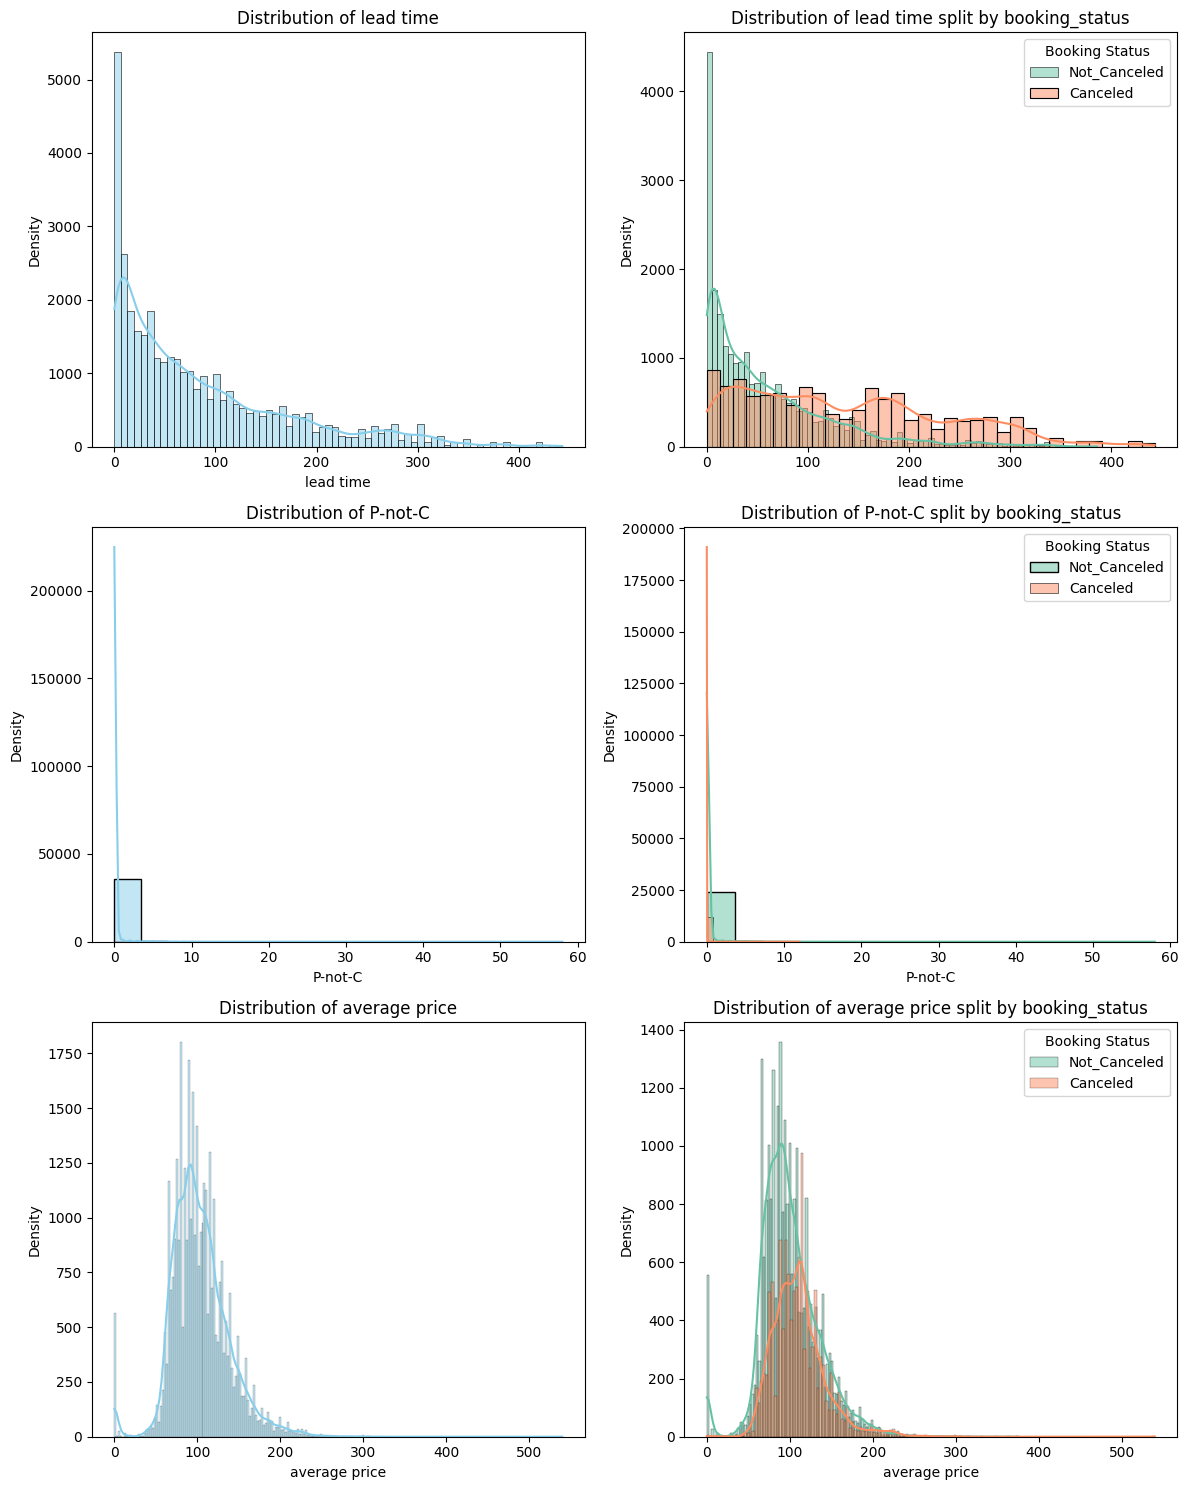

In [7]:
discrete_threshold = 20

# Separate discrete and continuous columns
discrete_columns = [col for col in numerical_columns if booking_data[col].nunique() < discrete_threshold]
continuous_columns = [col for col in numerical_columns if booking_data[col].nunique() >= discrete_threshold]

# Create subplots for discrete columns (2 plots per column: absolute and stacked share)
num_discrete_columns = len(discrete_columns)
fig1, axes1 = plt.subplots(nrows=num_discrete_columns, ncols=2, figsize=(12, 5*num_discrete_columns))

# Create subplots for continuous columns (2 plots per column: overall distribution and split distribution)
num_continuous_columns = len(continuous_columns)
fig2, axes2 = plt.subplots(nrows=num_continuous_columns, ncols=2, figsize=(12, 5*num_continuous_columns))

# Ensure axes is a 2D array even if there's only one subplot per row
if num_discrete_columns == 1:
    axes1 = [axes1]
if num_continuous_columns == 1:
    axes2 = [axes2]

# Plot discrete columns
for i, column in enumerate(discrete_columns):
    # Absolute value-based bar chart
    ax_abs = axes1[i][0]
    counts_abs = booking_data[column].value_counts().sort_index()
    bars_abs = counts_abs.plot(kind='bar', ax=ax_abs, color='skyblue')
    ax_abs.set_title(f'Absolute bar chart for {column}')
    ax_abs.set_xlabel(column)
    ax_abs.set_ylabel('Count')
    
    # Add absolute value labels on top of the bars
    for bar in bars_abs.patches:
        ax_abs.annotate(format(bar.get_height(), '.0f'), 
                        xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                        xytext=(0, 5),  # 5 points vertical offset
                        textcoords="offset points", 
                        ha='center', va='center')
    
    # Stacked share bar chart
    ax_stack = axes1[i][1]
    crosstab_stack = pd.crosstab(booking_data[column], booking_data['booking status'], normalize='index')
    crosstab_stack.plot(kind='bar', stacked=True, ax=ax_stack, color=['skyblue', 'orange'])  # Adjust colors as needed
    ax_stack.set_title(f'Stacked share bar chart for {column}')
    ax_stack.set_xlabel(column)
    ax_stack.set_ylabel('Percentage')
    
    # Add percentage labels on top of the bars
    for bar in ax_stack.patches:
        height = bar.get_height()
        if height > 0:  # Only annotate bars with height > 0
            ax_stack.annotate(f'{height:.1%}', 
                              xy=(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2),
                              xytext=(0, 0),  # No offset
                              textcoords="offset points", 
                              ha='center', va='center')

# Plot continuous columns
for i, column in enumerate(continuous_columns):
    # Overall distribution of the numerical column
    ax_dist = axes2[i][0]
    sns.histplot(data=booking_data, x=column, kde=True, ax=ax_dist, color='skyblue')
    ax_dist.set_title(f'Distribution of {column}')
    ax_dist.set_xlabel(column)
    ax_dist.set_ylabel('Density')
    
    # Split distribution based on booking_status
    ax_split_dist = axes2[i][1]
    booking_statuses = booking_data['booking status'].unique()
    for status in booking_statuses:
        subset = booking_data[booking_data['booking status'] == status]
        sns.histplot(data=subset, x=column, kde=True, label=status, ax=ax_split_dist, color=sns.color_palette('Set2')[booking_statuses.tolist().index(status)])
    
    ax_split_dist.set_title(f'Distribution of {column} split by booking_status')
    ax_split_dist.set_xlabel(column)
    ax_split_dist.set_ylabel('Density')
    ax_split_dist.legend(title='Booking Status')

plt.tight_layout()
plt.show()


##### Insights:
1. We have 10% less cancellation rate when there is only 1 adult in the booking as against 2 adults. Majority of the bookings doesn't have children however the inclusion of children doesn't seem to impact the booking cancellation rate 
2. Number of nights & Number of Special Requests seems to have a monotonic relationship with the cancellation rate since it increases as number of nights also increases
3. Presence of car parking space has a significant impact on the booking cancellation rate as cancellation rate is 20% less than the booking where there is no car parking space
4. There is fairly little share of repeat bookings and they have less cancellation rate
5. Previous cancellation doesn't indicate a higher probability of current booking cancellation since around 30% of the bookings are cancelled when there is no pre-cancellations
6. Price of booking only plays a small difference in the cancellation rate as the avg price increases slightly for cancelled bookings
7. Cancellations are much less wwhen the lead time is shorter duration

### Relationship between dependent variables
#### Does day of reservation has an impact on cancellations?

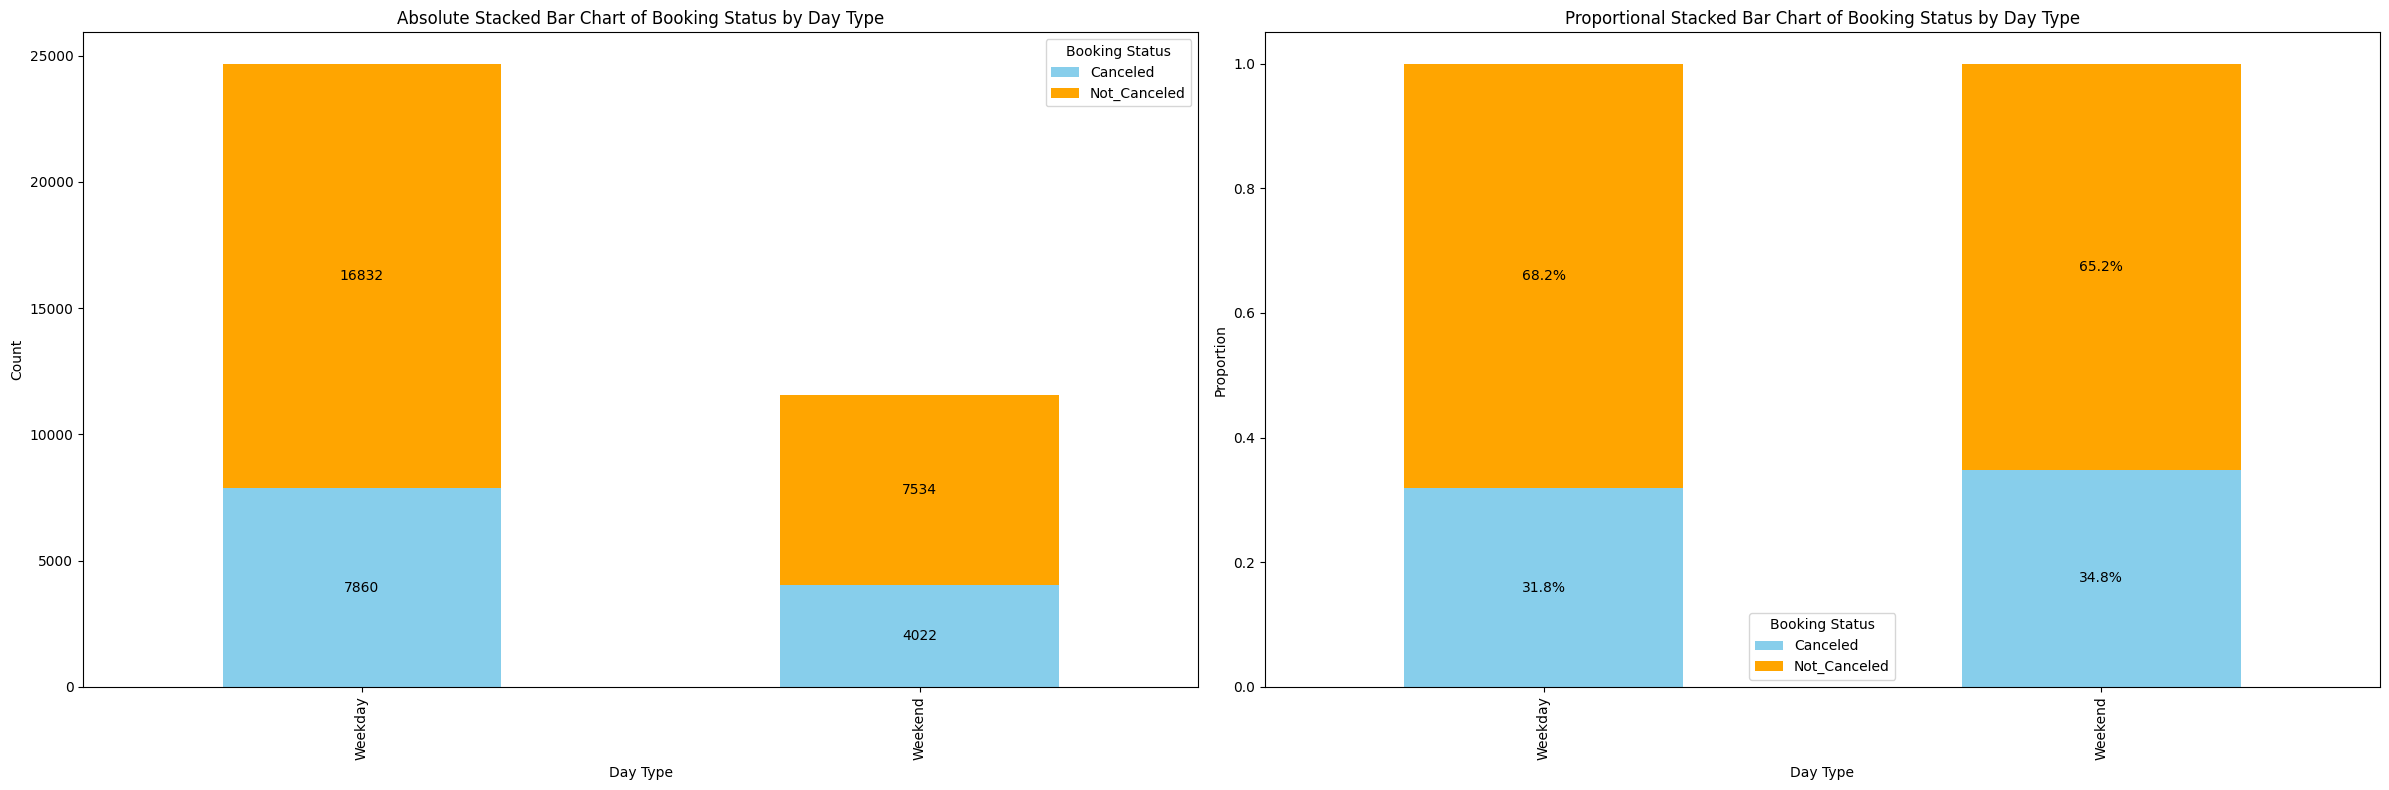

In [20]:
# Getting weekend or weekday on date of reservation
booking_data['date of reservation'] = pd.to_datetime(booking_data['date of reservation'], errors='coerce', infer_datetime_format=True)
booking_data.dropna(subset=['date of reservation'], inplace=True)
booking_data['day_type'] = booking_data['date of reservation'].dt.dayofweek.apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Create a crosstab for the absolute numbers
absolute_data = pd.crosstab(booking_data['day_type'], booking_data['booking status'])

# Create a crosstab for the proportional data
proportional_data = pd.crosstab(booking_data['day_type'], booking_data['booking status'], normalize='index')

# Plot absolute and proportional stacked bar charts
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(24, 8))

# Absolute stacked bar chart
absolute_data.plot(kind='bar', stacked=True, ax=ax1, color=['skyblue', 'orange'])  # Adjust colors as needed
ax1.set_title('Absolute Stacked Bar Chart of Booking Status by Day Type')
ax1.set_xlabel('Day Type')
ax1.set_ylabel('Count')
ax1.legend(title='Booking Status')

# Add absolute value labels on top of the bars
for bar in ax1.patches:
    height = bar.get_height()
    if height > 0:  # Only annotate bars with height > 0
        ax1.annotate(f'{height:.0f}', 
                     xy=(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2),
                     xytext=(0, 0),  # No offset
                     textcoords="offset points", 
                     ha='center', va='center')

# Proportional stacked bar chart
proportional_data.plot(kind='bar', stacked=True, ax=ax2, color=['skyblue', 'orange'])  # Adjust colors as needed
ax2.set_title('Proportional Stacked Bar Chart of Booking Status by Day Type')
ax2.set_xlabel('Day Type')
ax2.set_ylabel('Proportion')
ax2.legend(title='Booking Status')

# Add proportion value labels on top of the bars
for bar in ax2.patches:
    height = bar.get_height()
    if height > 0:  # Only annotate bars with height > 0
        ax2.annotate(f'{height:.1%}', 
                     xy=(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2),
                     xytext=(0, 0),  # No offset
                     textcoords="offset points", 
                     ha='center', va='center')

plt.tight_layout()
plt.show()


#### Does adult with children have less probability of cancellation?

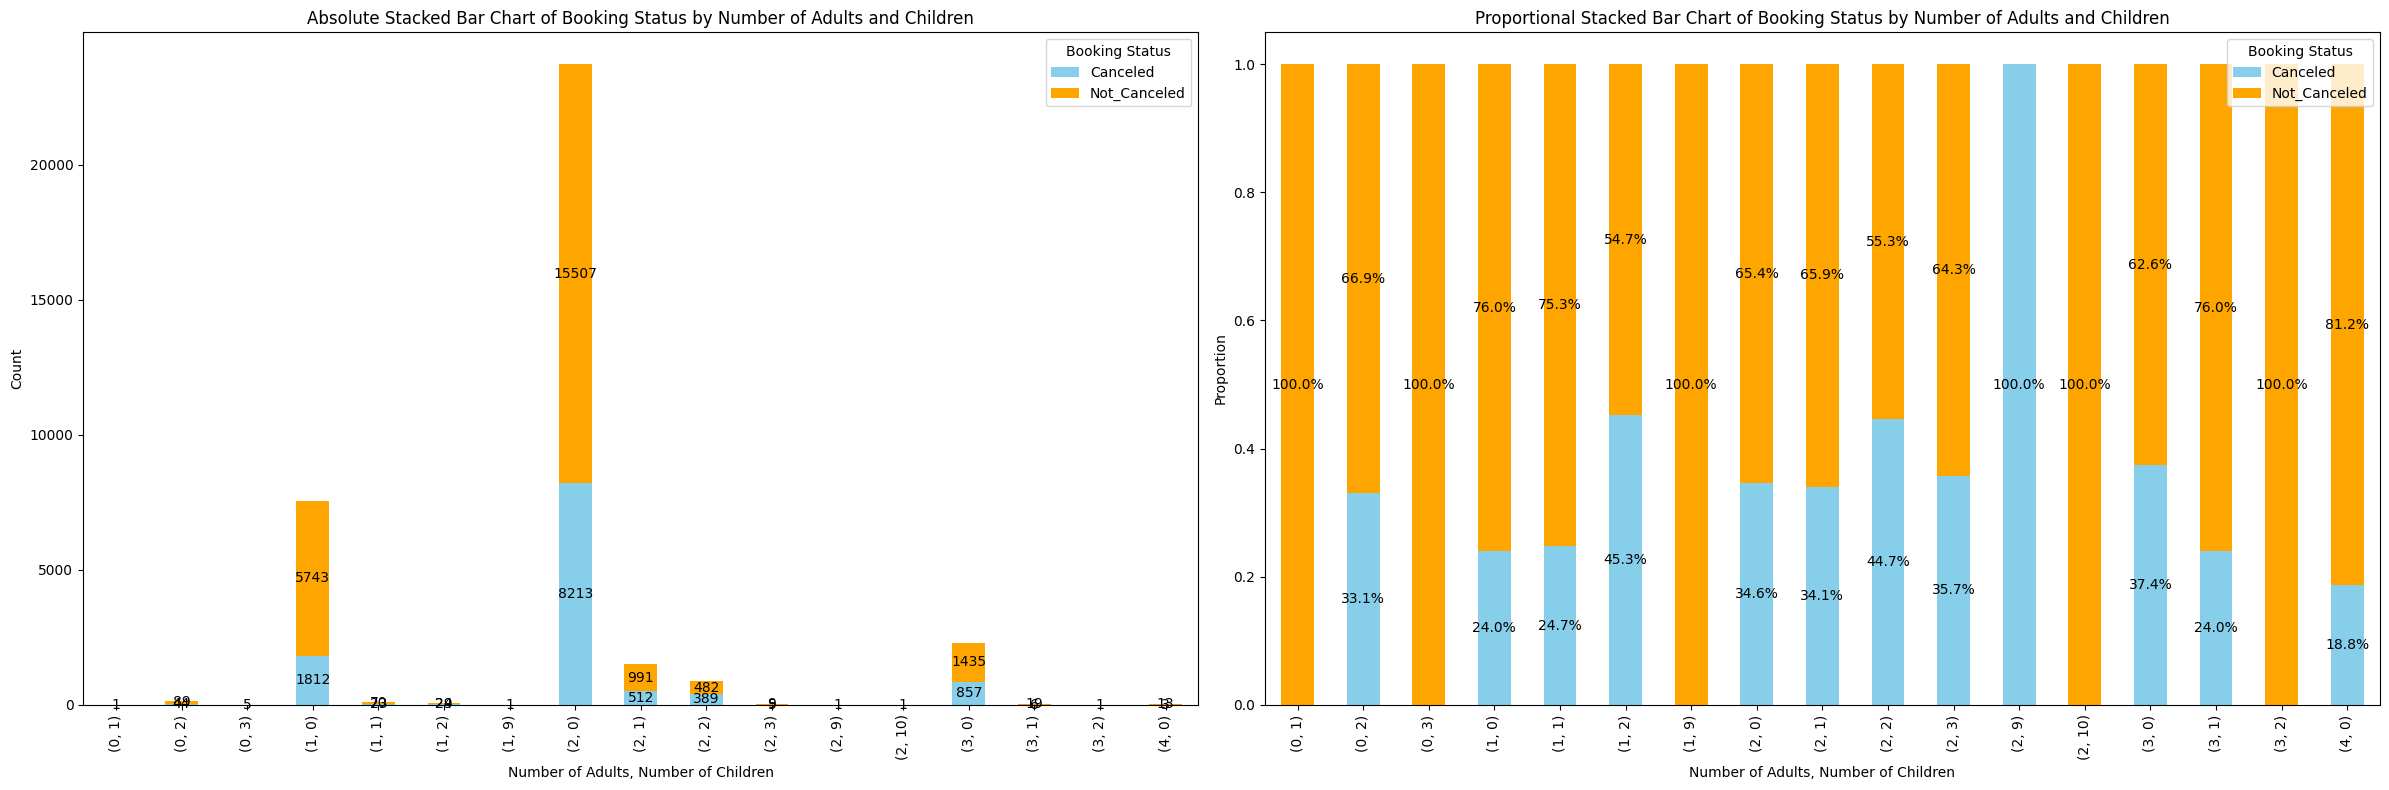

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assume booking_data is your DataFrame

# Create a crosstab for the absolute numbers
absolute_data = pd.crosstab([booking_data['number of adults'], booking_data['number of children']],
                            booking_data['booking status'])

# Create a crosstab for the proportional data
proportional_data = pd.crosstab([booking_data['number of adults'], booking_data['number of children']],
                                booking_data['booking status'], normalize='index')

# Plot absolute and proportional stacked bar charts
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(24, 8))

# Absolute stacked bar chart
absolute_data.plot(kind='bar', stacked=True, ax=ax1, color=['skyblue', 'orange'])  # Adjust colors as needed
ax1.set_title('Absolute Stacked Bar Chart of Booking Status by Number of Adults and Children')
ax1.set_xlabel('Number of Adults, Number of Children')
ax1.set_ylabel('Count')
ax1.legend(title='Booking Status')

# Add absolute value labels on top of the bars
for bar in ax1.patches:
    height = bar.get_height()
    if height > 0:  # Only annotate bars with height > 0
        ax1.annotate(f'{height:.0f}', 
                     xy=(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2),
                     xytext=(0, 0),  # No offset
                     textcoords="offset points", 
                     ha='center', va='center')

# Proportional stacked bar chart
proportional_data.plot(kind='bar', stacked=True, ax=ax2, color=['skyblue', 'orange'])  # Adjust colors as needed
ax2.set_title('Proportional Stacked Bar Chart of Booking Status by Number of Adults and Children')
ax2.set_xlabel('Number of Adults, Number of Children')
ax2.set_ylabel('Proportion')
ax2.legend(title='Booking Status')

# Add proportion value labels on top of the bars
for bar in ax2.patches:
    height = bar.get_height()
    if height > 0:  # Only annotate bars with height > 0
        ax2.annotate(f'{height:.1%}', 
                     xy=(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2),
                     xytext=(0, 0),  # No offset
                     textcoords="offset points", 
                     ha='center', va='center')

plt.tight_layout()
plt.show()


#### Are family with children price sensitive ?

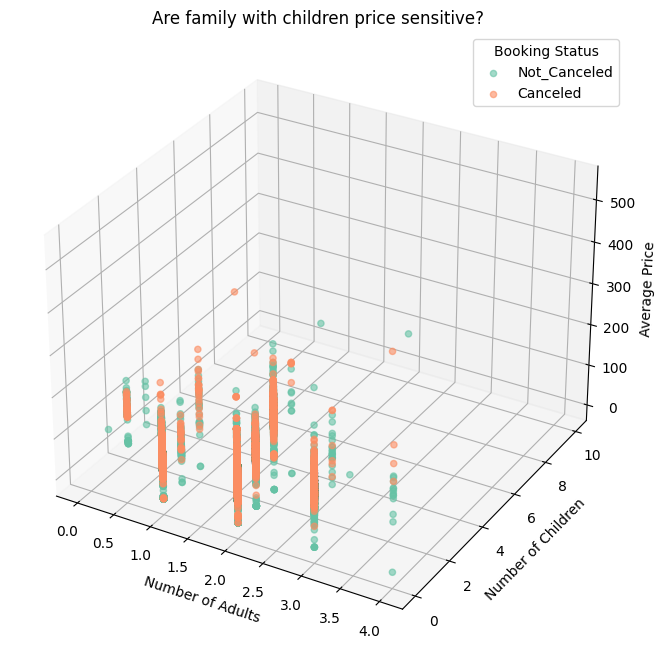

In [10]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

unique_statuses = booking_data['booking status'].unique()


color_palette = sns.color_palette('Set2', len(unique_statuses))
colors = dict(zip(unique_statuses, color_palette))

for status in unique_statuses:
    subset = booking_data[booking_data['booking status'] == status]
    ax.scatter(subset['number of adults'], subset['number of children'], subset['average price'], 
               color=colors[status], label=status, alpha=0.6)

ax.set_xlabel('Number of Adults')
ax.set_ylabel('Number of Children')
ax.set_zlabel('Average Price')
ax.set_title('Are family with children price sensitive?')
ax.legend(title='Booking Status')
plt.show()


#### Does offline customers get cheaper price? and do they have higher cancellations?

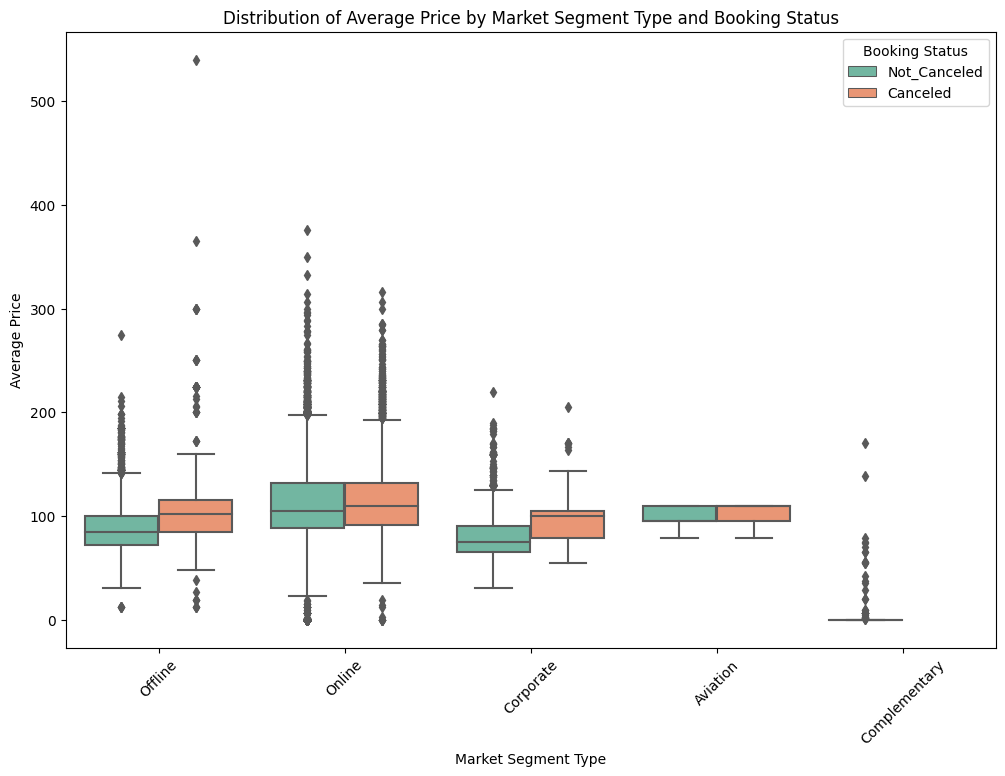

In [14]:
# Plot box plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=booking_data, x='market segment type', y='average price', hue='booking status', palette='Set2')
plt.title('Distribution of Average Price by Market Segment Type and Booking Status')
plt.xlabel('Market Segment Type')
plt.ylabel('Average Price')
plt.legend(title='Booking Status')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()


#### Does more lead time lead to higher price and more cancellations?

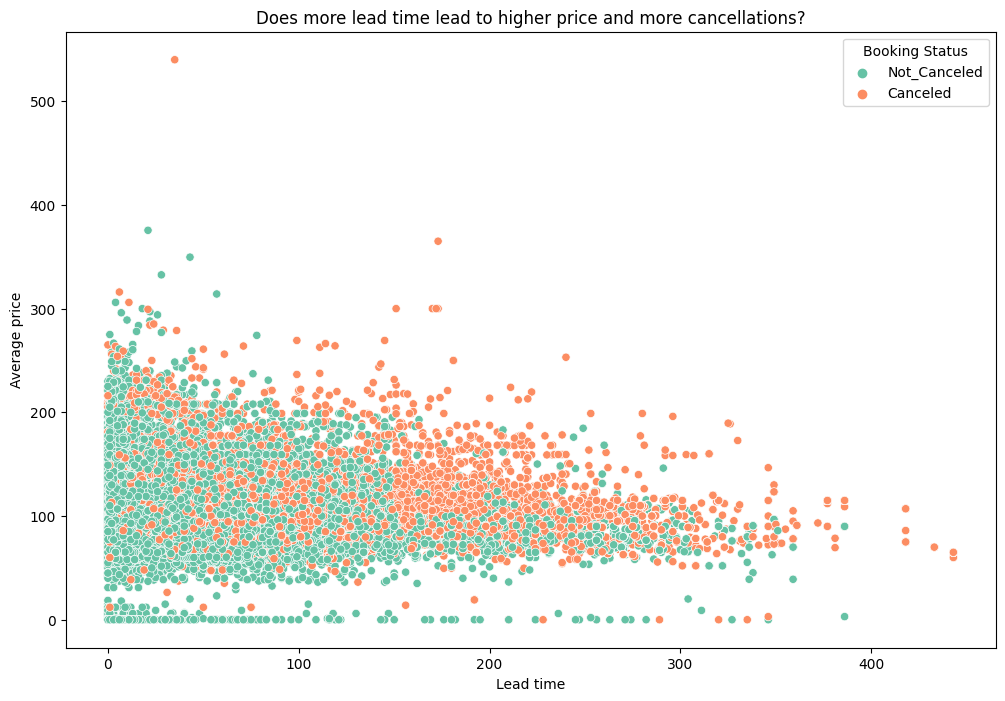

In [11]:
# Plot scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=booking_data, x='lead time', y='average price', hue='booking status', palette='Set2')
plt.title('Does more lead time lead to higher price and more cancellations?')
plt.xlabel('Lead time')
plt.ylabel('Average price')
plt.legend(title='Booking Status')
plt.show()


In [29]:
label_encoder=LabelEncoder()
booking_data['booking status']=label_encoder.fit_transform(booking_data['booking status'])

In [30]:
# Convert Index to list
numerical_columns_list = list(numerical_columns)

# Add 'booking status' to the list
numerical_columns_list.append('booking status')

# Create a new Index from the updated list
numerical_columns = pd.Index(numerical_columns_list)


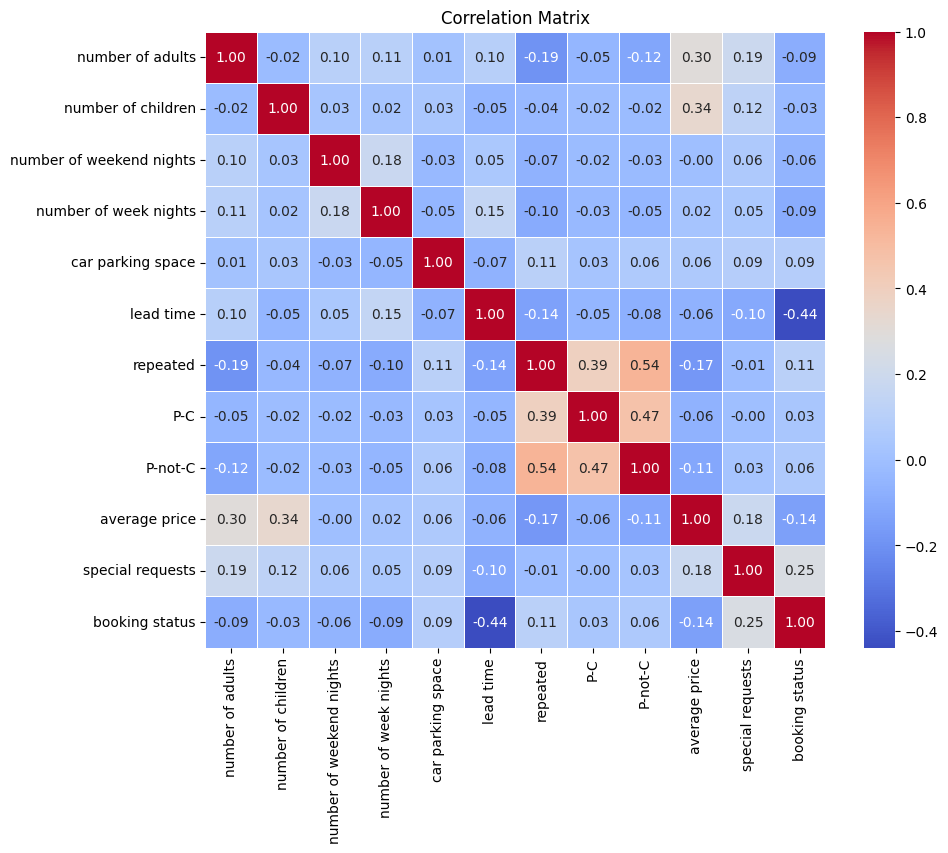

In [31]:
numerical_data=booking_data[numerical_columns]
correlation_data=numerical_data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_data,annot=True,cmap='coolwarm',fmt='.2f',
            linewidth=.5)
plt.title('Correlation Matrix')
plt.show()

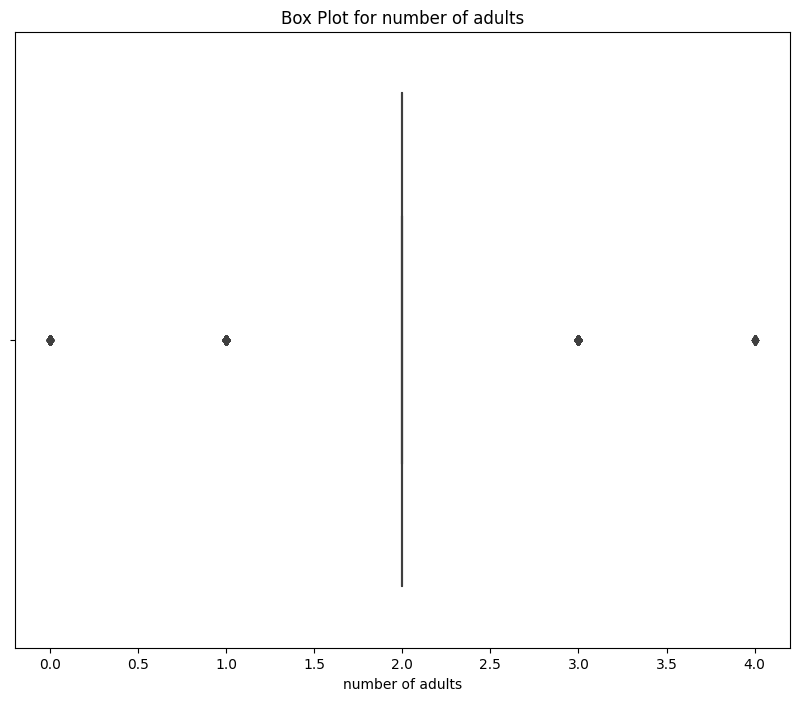

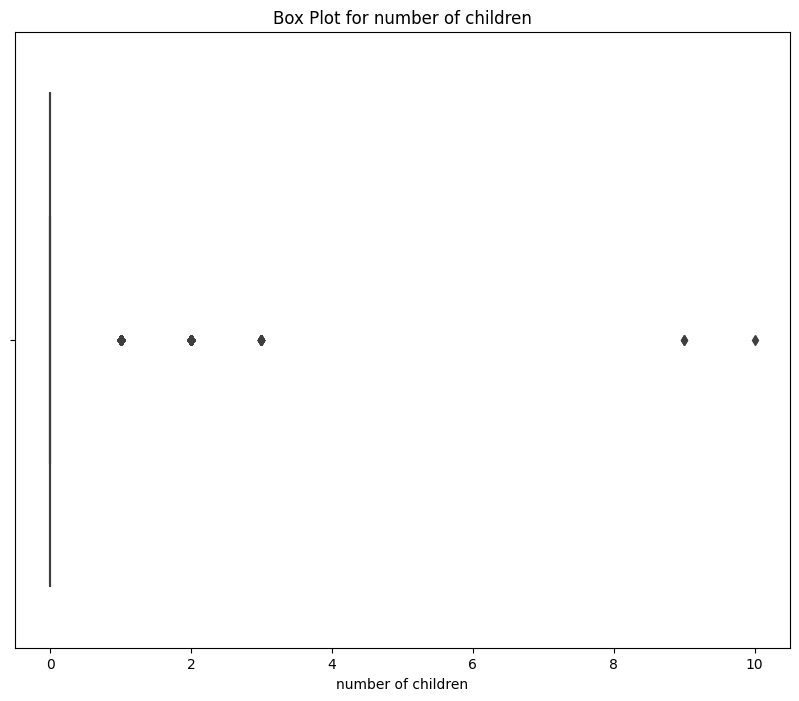

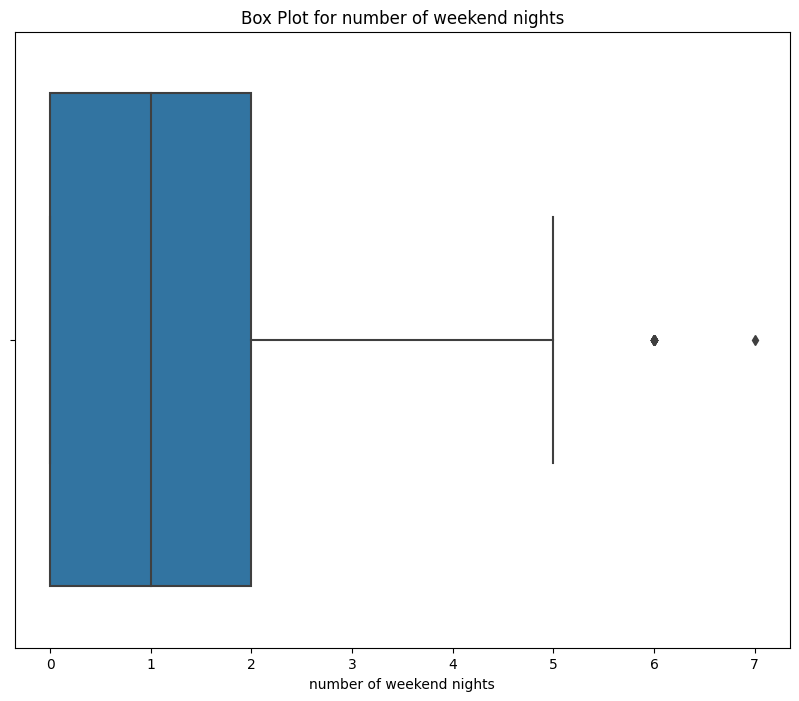

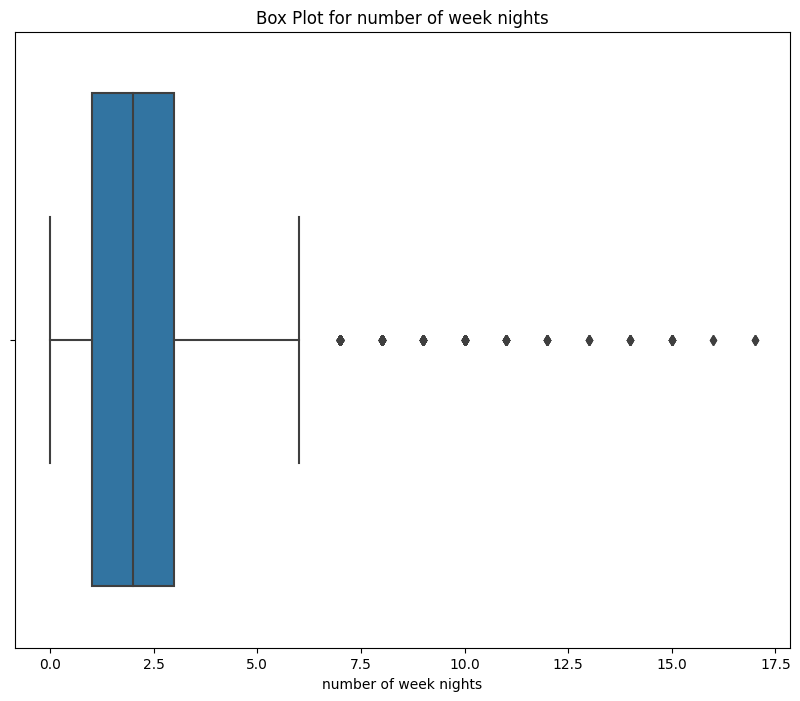

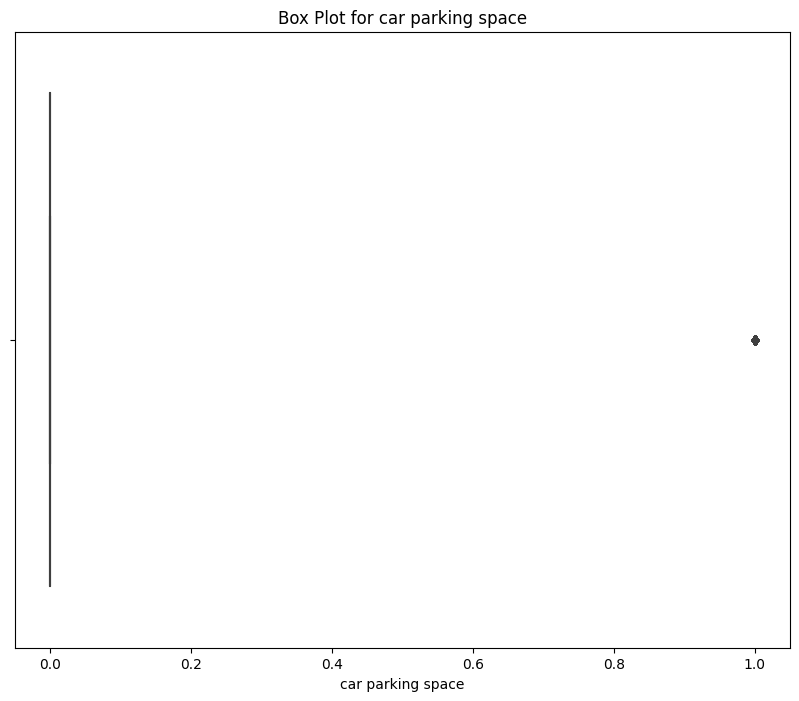

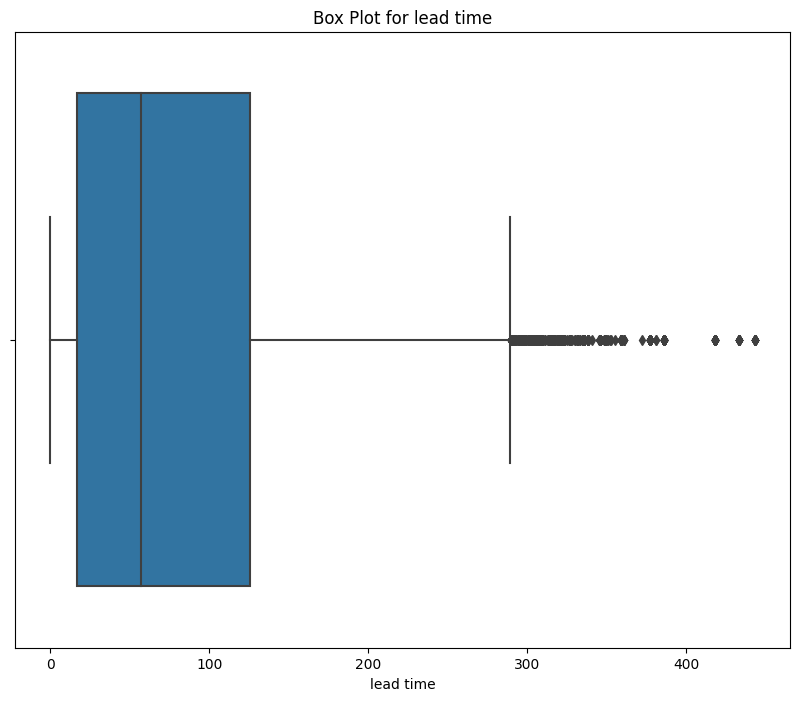

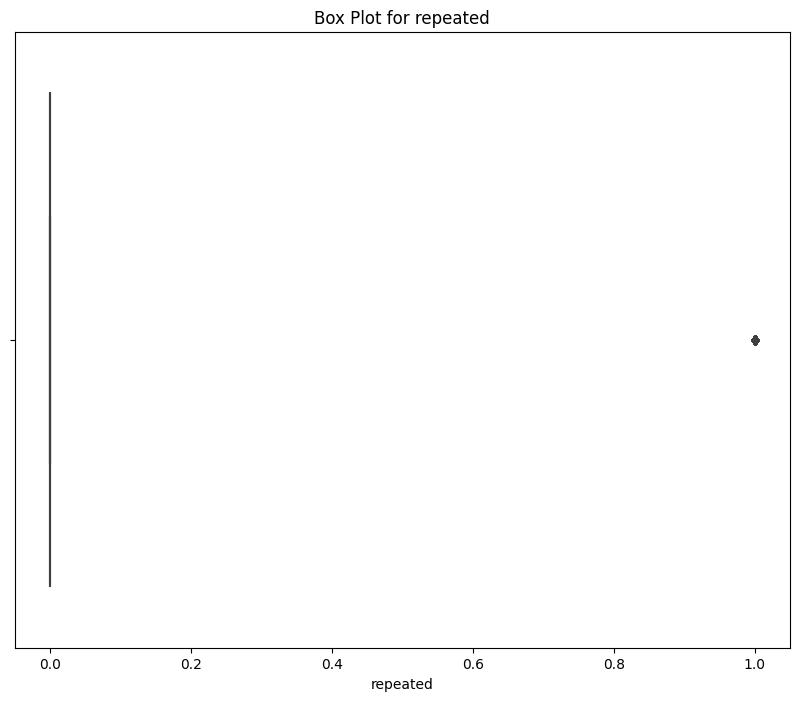

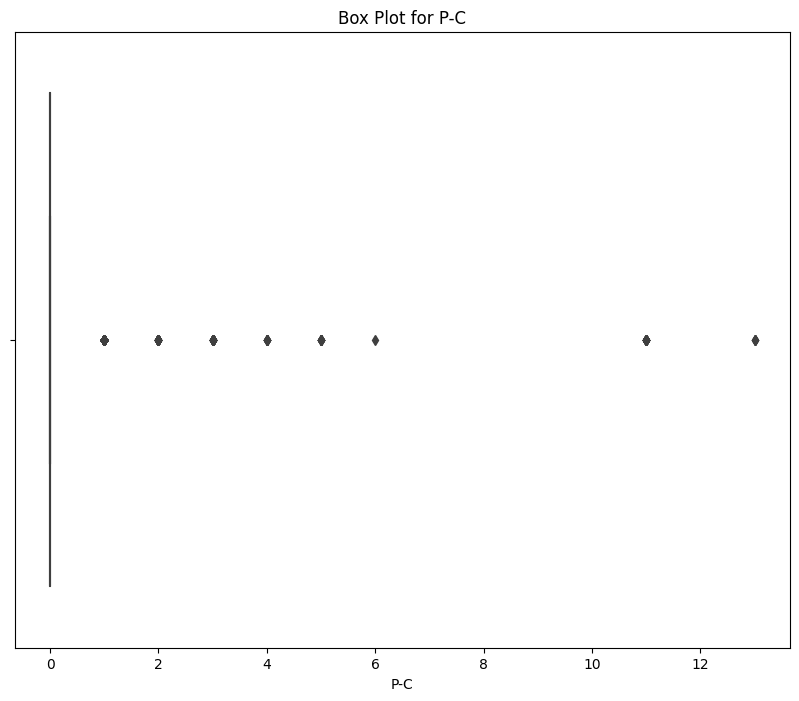

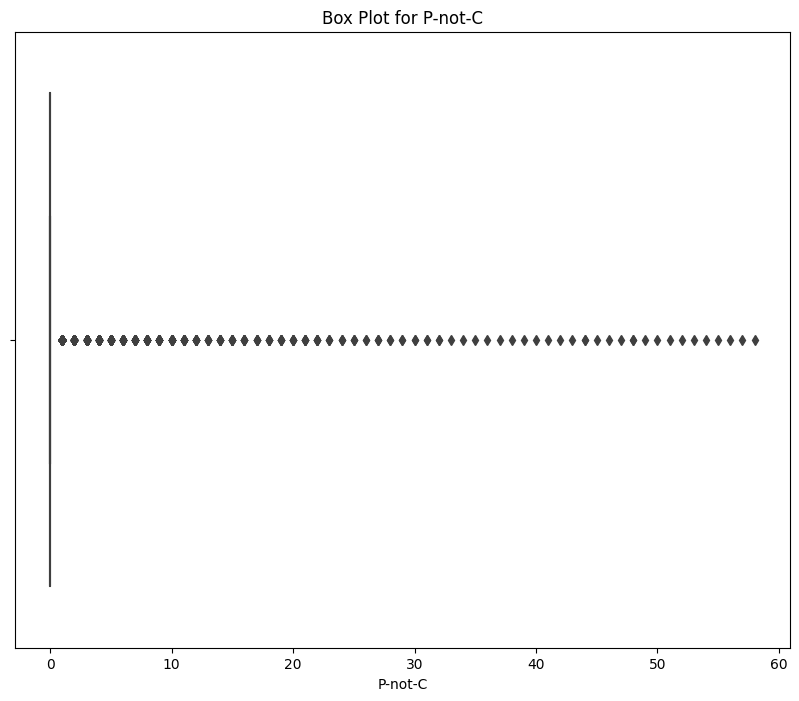

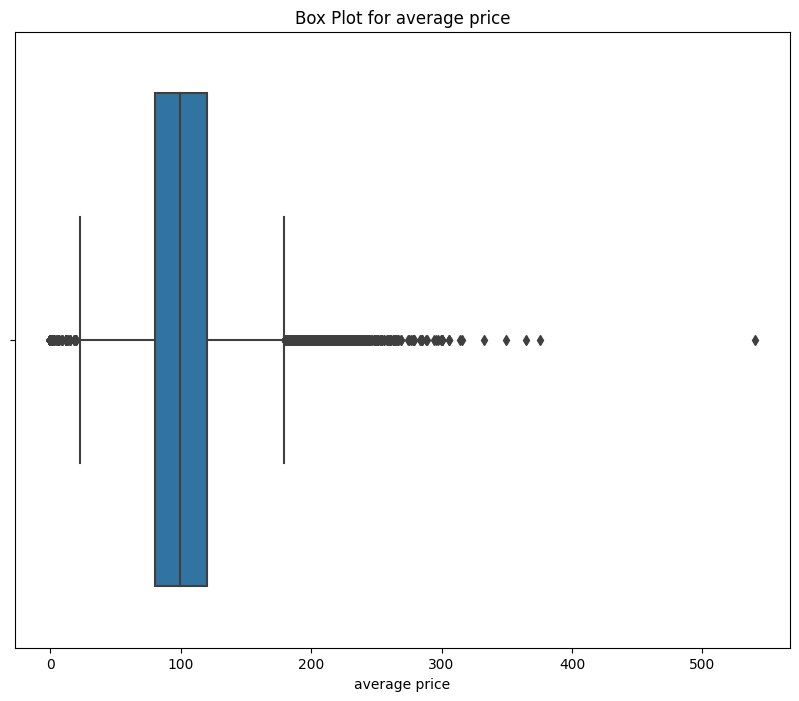

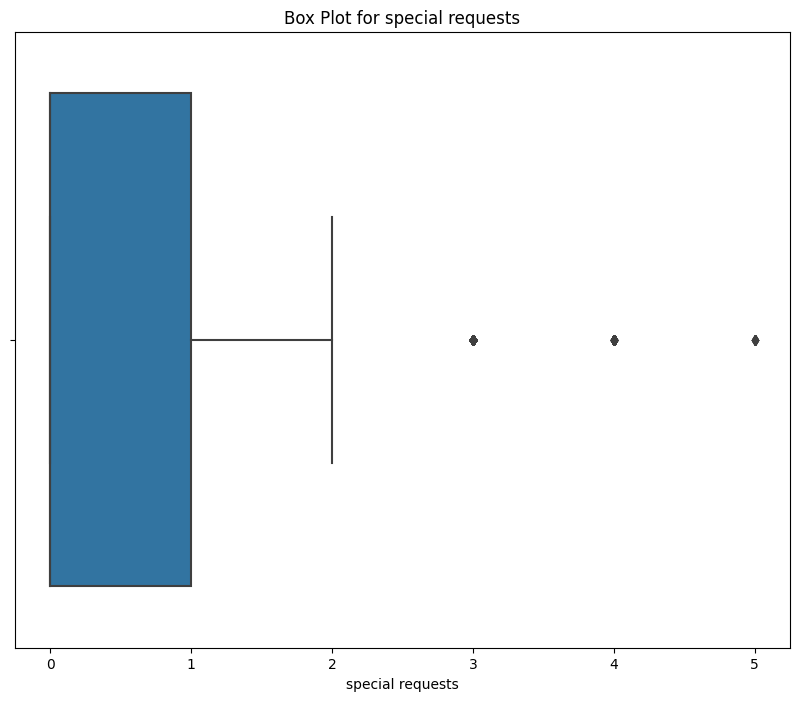

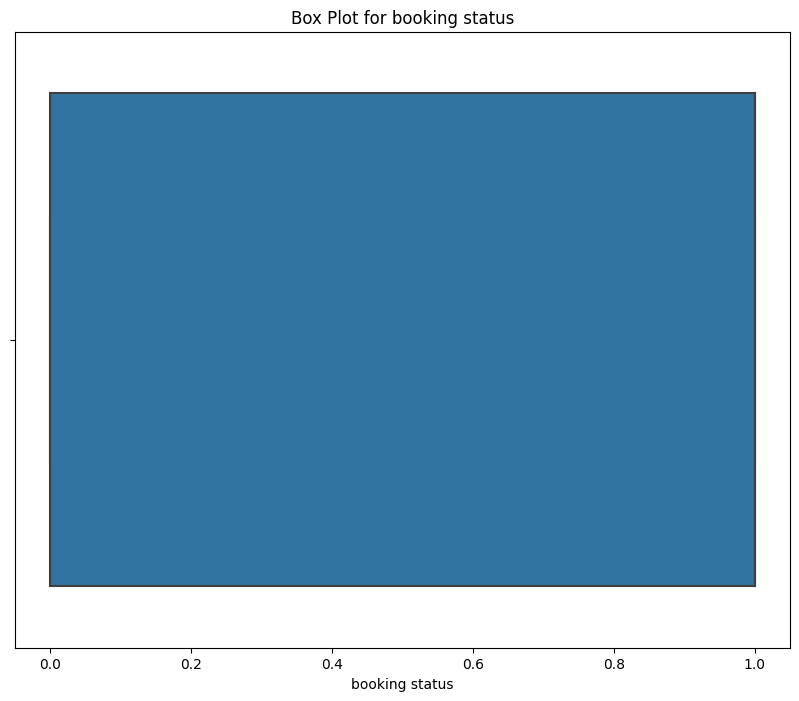

In [37]:
for column in numerical_columns:
    plt.figure(figsize=(10,8))
    sns.boxplot(x=booking_data[column])

    plt.title(f'Box Plot for {column}')
    plt.show()
